#02. PyTorch Neural Network Classification

What is a classification problem?
A [classification problem](https://en.wikipedia.org/wiki/Statistical_classification) involves predicting whether something is one thing or another.

1. Binary classification

Target can be one of two options, e.g. yes or no

Predict whether or not someone has heart disease based on their health parameters.

2. Multi-class classification

Target can be one of more than two options

Decide whether a photo is of food, a person or a dog.

3. Multi-label classification

Target can be assigned more than one option

Predict what categories should be assigned to a Wikipedia article (e.g. mathematics, science & philosophy).

In this notebook, we're going to work through a couple of different classification problems with PyTorch. In other words, taking a set of inputs and predicting what class those set of inputs belong to.
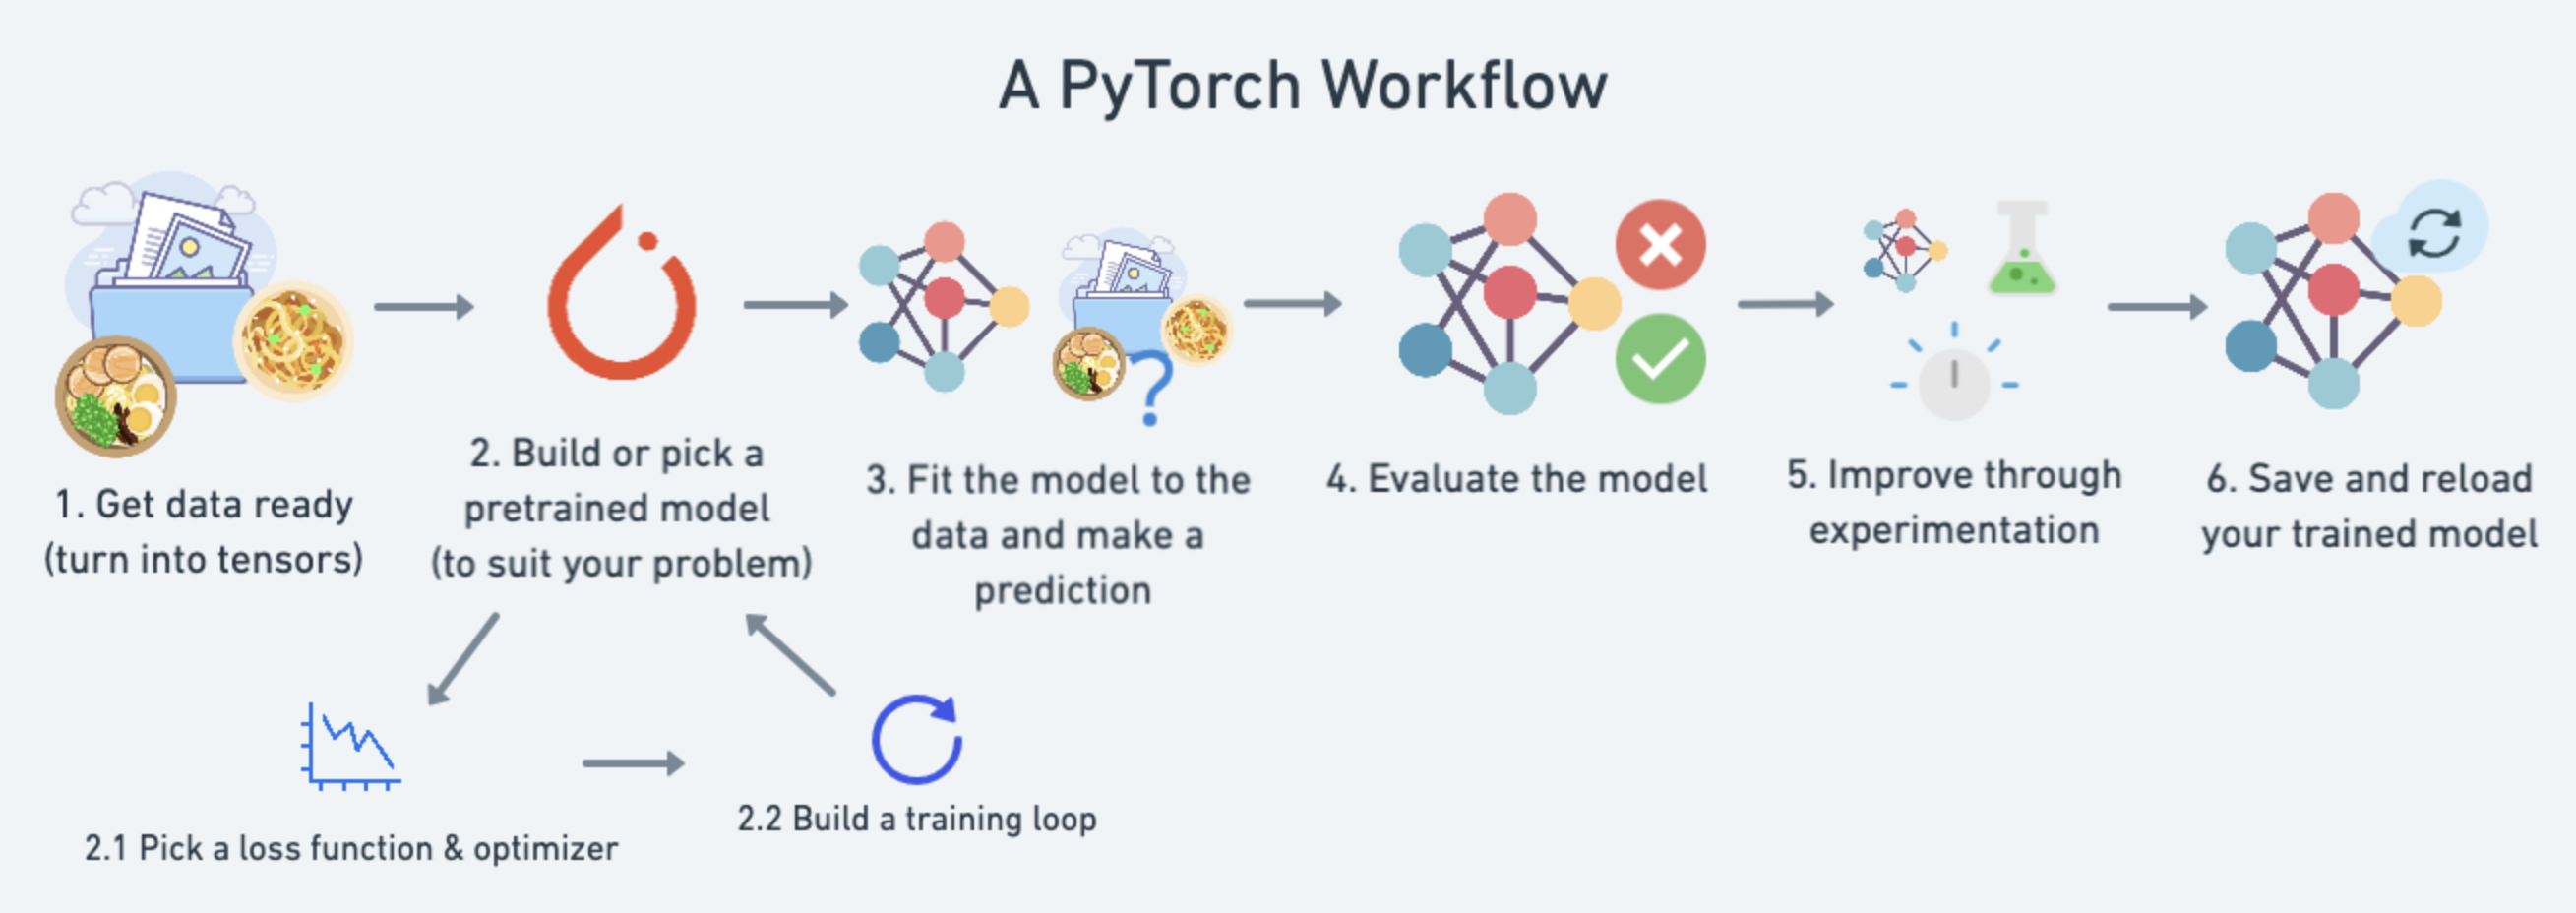


**0. Architecture of a classification neural network**
Neural networks can come in almost any shape or size, but they typically follow a similar floor plan.

**1. Getting binary classification data ready**
Data can be almost anything but to get started we're going to create a simple binary classification dataset.

**2. Building a PyTorch classification model**	H
ere we'll create a model to learn patterns in the data, we'll also choose a **loss function**, **optimizer** and build a **training loop **specific to classification.

**3. Fitting the model to data (training)**
We've got data and a model, now let's let the model (try to) find patterns in the (**training**) data.

**4. Making predictions and evaluating a model (inference)**
Our model's found patterns in the data, let's compare its findings to the actual (**testing**) data.

**5. Improving a model (from a model perspective)**
We've trained and evaluated a model but it's not working, let's try a few things to improve it.

**6. Non-linearity**
So far our model has only had the ability to model straight lines, what about non-linear (non-straight) lines?

**7. Replicating non-linear functions**
We used **non-linear functions** to help model non-linear data, but what do these look like?

**8. Putting it all together with multi-class classification**

Let's put everything we've done so far for binary classification together with a multi-class classification problem.

#0. Architecture of a classification neural network

General architecture of a classification neural network.
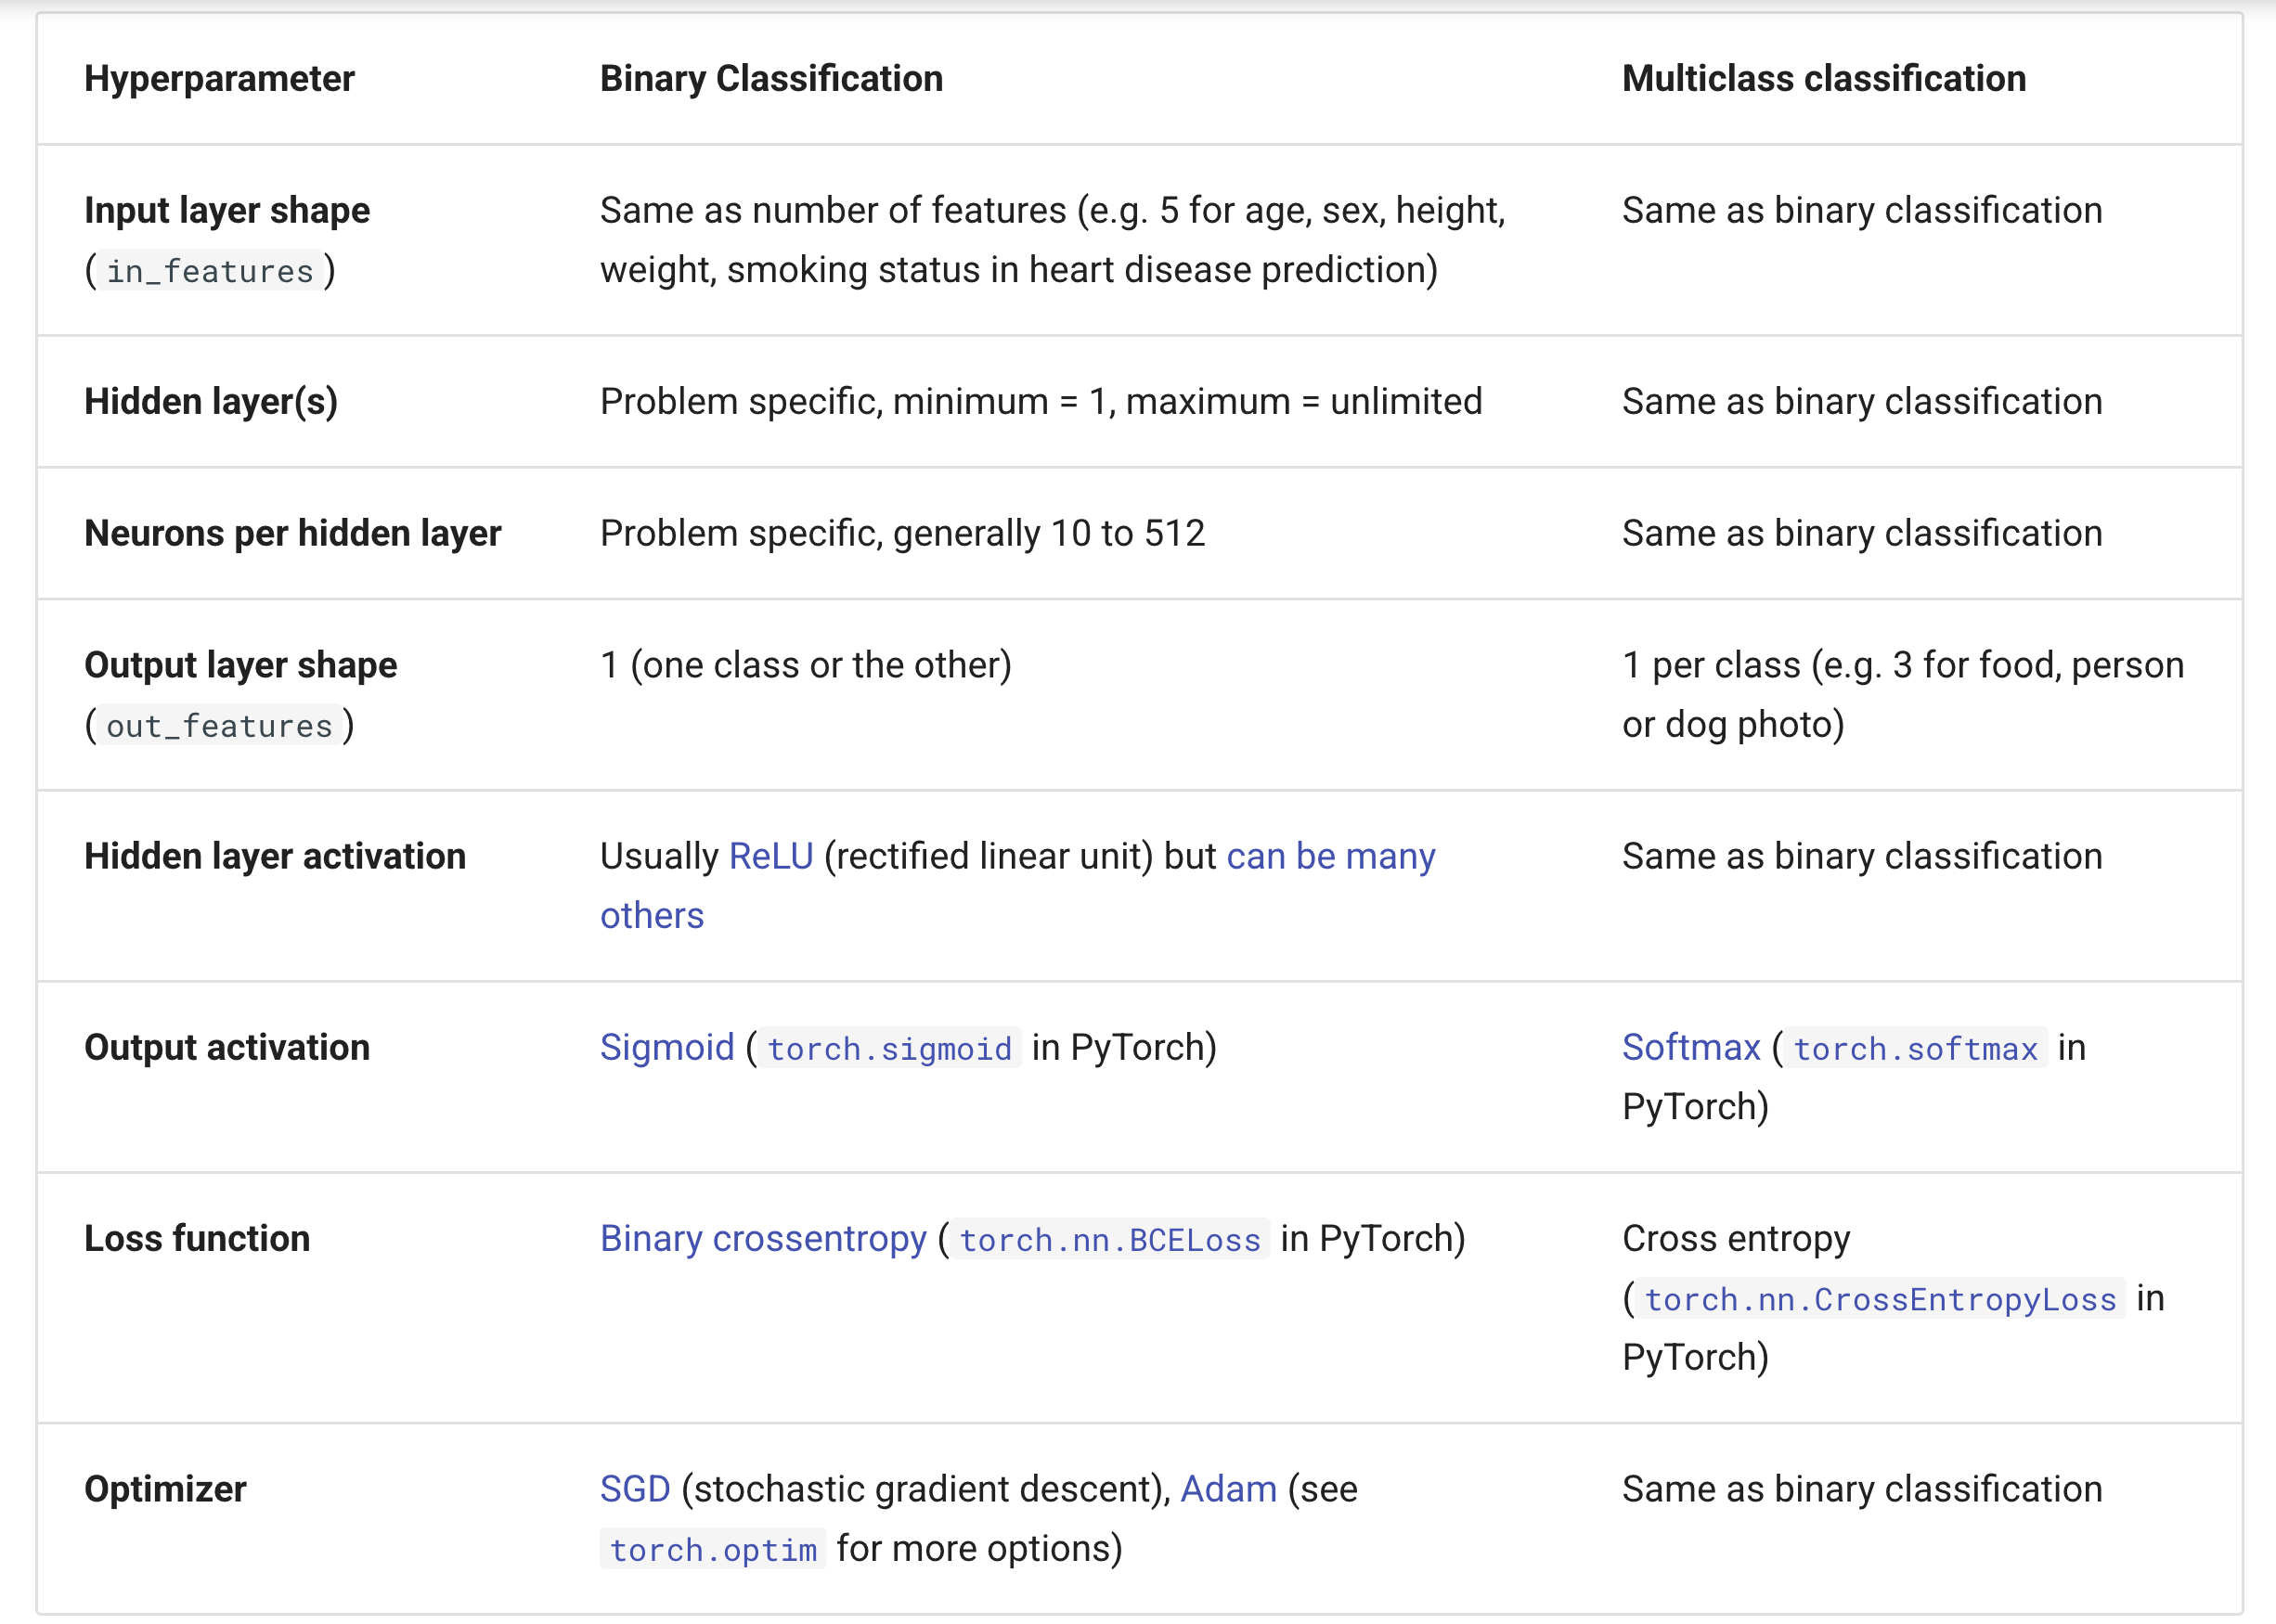


[ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU)

[Table of activation functions](https://en.wikipedia.org/wiki/Activation_function#Table_of_activation_functions)

[Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function)
[`torch.sigmoid`](https://pytorch.org/docs/stable/generated/torch.sigmoid.html)

[Softmax](https://en.wikipedia.org/wiki/Softmax_function)
[`torch.softmax`](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html)

[Binary crossentropy](https://en.wikipedia.org/wiki/Cross-entropy#Cross-entropy_loss_function_and_logistic_regression)
[`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html)
[`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)

[SGD (stochastic gradient descent)](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html)

[Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html)
[`torch.optim`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html)


#1. Make classification data and get it ready
We'll use the [`make_circles()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html) method from Scikit-Learn to generate two circles with different coloured dots.

In [1]:
from sklearn.datasets import make_circles


# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

In [2]:
#let's view the first 5 X and y values
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


Looks like there's two `X` values per one `y` value.

Visualize through pandas DataFrame.

In [3]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


Looks like each pair of `X` features (`X1` and `X2`) has a label (`y`) value of either 0 or 1.

This tells us that our problem is **binary classification** since there's only two options (0 or 1).

How many values of each class are there?

In [4]:
# Check different labels
circles.label.value_counts()

,count
label,
1,500
0,500


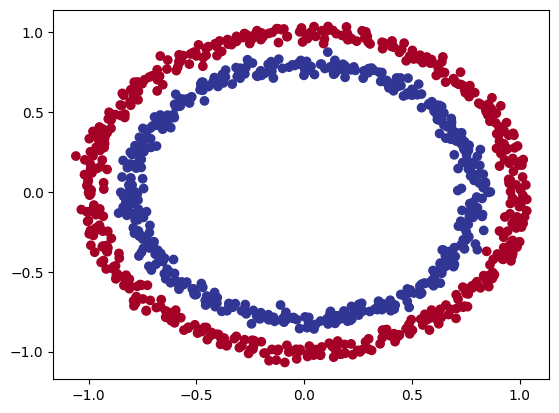

In [5]:
#500 each, nice and balanced. Let's plot to visualize them.
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

Let's find out how we could build a PyTorch neural network to classify dots into red (0) or blue (1). Note: This dataset is often what's considered a problem that's used to try and test things out on in machine learning. It represents the major key of classification, you have some kind of data represented as numerical values and you'd like to build a model that's able to classify it, in our case, separate it into red or blue dots.

#1.1 Input and output shapes
One of the most common errors in deep learning is shape errors. Mismatching the shapes of tensors and tensor operations will result in errors in models.

"What shapes are my inputs and what shapes are my outputs?"

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

Looks like we've got a match on the first dimension of each. There's 1000 `X` and 1000 `y`.

But what's the second dimension on X? View the values and shapes of a single sample (features and labels). Understanding what input and output shapes you'd be expecting from your model is important.

In [7]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


This tells us the second dimension for X means it has two features (vector) where as y has a single feature (scalar). We have two inputs for one output.

#1.2 Turn data into tensors and create train and test splits
We've investigated the input and output shapes of our data, now let's prepare it for being used with PyTorch and for modelling.

Specifically, we'll need to:

1. Turn our data into tensors (right now our data is in NumPy arrays and PyTorch prefers to work with PyTorch tensors).

2. Split our data into training and test sets (we'll train a model on the training set to learn the patterns between `X` and `y` and then evaluate those learned patterns on the test dataset).

In [8]:
# Turn data into tensors
# Otherwise this causes issues with computations later on
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# View the first five samples
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))


Now our data is in tensor format, let's split it into training and test sets.

To do so, let's use the helpful function `train_test_split()` from Scikit-Learn.

We'll use `test_size=0.2` (80% training, 20% testing) and because the split happens randomly across the data, let's use `random_state=42` so the split is reproducible.

In [9]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

We've now got 800 training samples and 200 testing samples.

#2. Building a model
We've got some data ready, now it's time to build a model. We'll break it down into a few parts.

1. Setting up device agnostic code (so our model can run on CPU or GPU if it's available).
2. Constructing a model by subclassing `nn.Module`.
3. Defining a loss function and optimizer.
4. Creating a training loop.

Let's start by importing PyTorch and `torch.nn` as well as setting up device agnostic code.

In [10]:
# Standard PyTorch imports
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

Device is setup, we can use it for any data or models we create and PyTorch will handle it on the CPU (default) or GPU if it's available.

How about we create a model?

We'll want a model capable of handling our `X` data as inputs and producing something in the shape of our `y` data as outputs.

In other words, given `X` (features) we want our model to predict `y` (label).

This setup where you have features and labels is referred to as **supervised learning**. Because your data is telling your model what the outputs should be given a certain input.

To create such a model it'll need to handle the input and output shapes of `X` and `y`.

Let's create a model class that:

1. Subclasses `nn.Module` (almost all PyTorch models are subclasses of `nn.Module`).

2. Creates 2 `nn.Linear` layers in the constructor capable of handling the input and output shapes of `X` and `y`.

3. Defines a `forward()` method containing the forward pass computation of the model.

4. Instantiates the model class and sends it to the target `device`.

In [11]:
# 1. Construct a model class that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features (X), produces 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features, produces 1 feature (y)

    # 3. Define a forward method containing the forward pass computation
    def forward(self, x):
        # Return the output of layer_2, a single feature, the same shape as y
        return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then the output of layer_1 goes through layer_2

# 4. Create an instance of the model and send it to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

`self.layer_1` takes 2 input features `in_features=2` and produces 5 output features `out_features=5`. This is known as having 5 **hidden units or neurons**.
This layer turns the input data from having 2 features to 5 features. Why do this? This allows the model to learn patterns from 5 numbers rather than just 2 numbers, potentially leading to better outputs. (Sometimes it doesn't work).

The number of **hidden units** you can use in neural network layers is
a **hyperparameter(a value you can set yourself)** and there's no set in stone value you have to use. Generally more is better but there's also such a thing as too much. The amount you choose will depend on your model type and dataset you're working with.

Since our dataset is small and simple, we'll keep it small.The only rule with hidden units is that the next layer, in our case, `self.layer_2` has to take the same `in_features` as the previous layer `out_features`.

That's why `self.layer_2` has `in_features=5`, it takes the `out_features=5` from `self.layer_1` and performs a linear computation on them, turning them into `out_features=1` (the same shape as y).

In [12]:
# Replicate CircleModelV0 with nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

This looks much simpler than subclassing `nn.Module`, why not just always use `nn.Sequential`?

`nn.Sequential` is fantastic for straight-forward computations, however, as the namespace says, it always runs in sequential order.

So if you'd like something else to happen (rather than just straight-forward sequential computation) you'll want to define your own custom `nn.Module` subclass.

Now we've got a model, let's see what happens when we pass some data through it.

In [13]:
# Make predictions with the model
untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[-0.2262],
        [-0.1971],
        [-0.0949],
        [-0.2643],
        [ 0.2349],
        [ 0.2502],
        [ 0.0709],
        [ 0.1764],
        [-0.1090],
        [-0.1915]], grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


It seems there are the same amount of predictions as there are test labels but the predictions don't look like they're in the same form or shape as the test labels. We've got a couple steps we can do to fix this, we'll see these later on.

#2.1 Setup loss function and optimizer

Different problem types require different loss functions.

For example, for a regression problem (predicting a number) you might use mean absolute error (MAE) loss.

And for a binary classification problem (like ours), you'll often use binary cross entropy as the loss function.

However, the same optimizer function can often be used across different problem spaces.

For example, the stochastic gradient descent optimizer (SGD, `torch.optim.SGD()`) can be used for a range of problems, and the same applies to the Adam optimizer (`torch.optim.Adam()`).

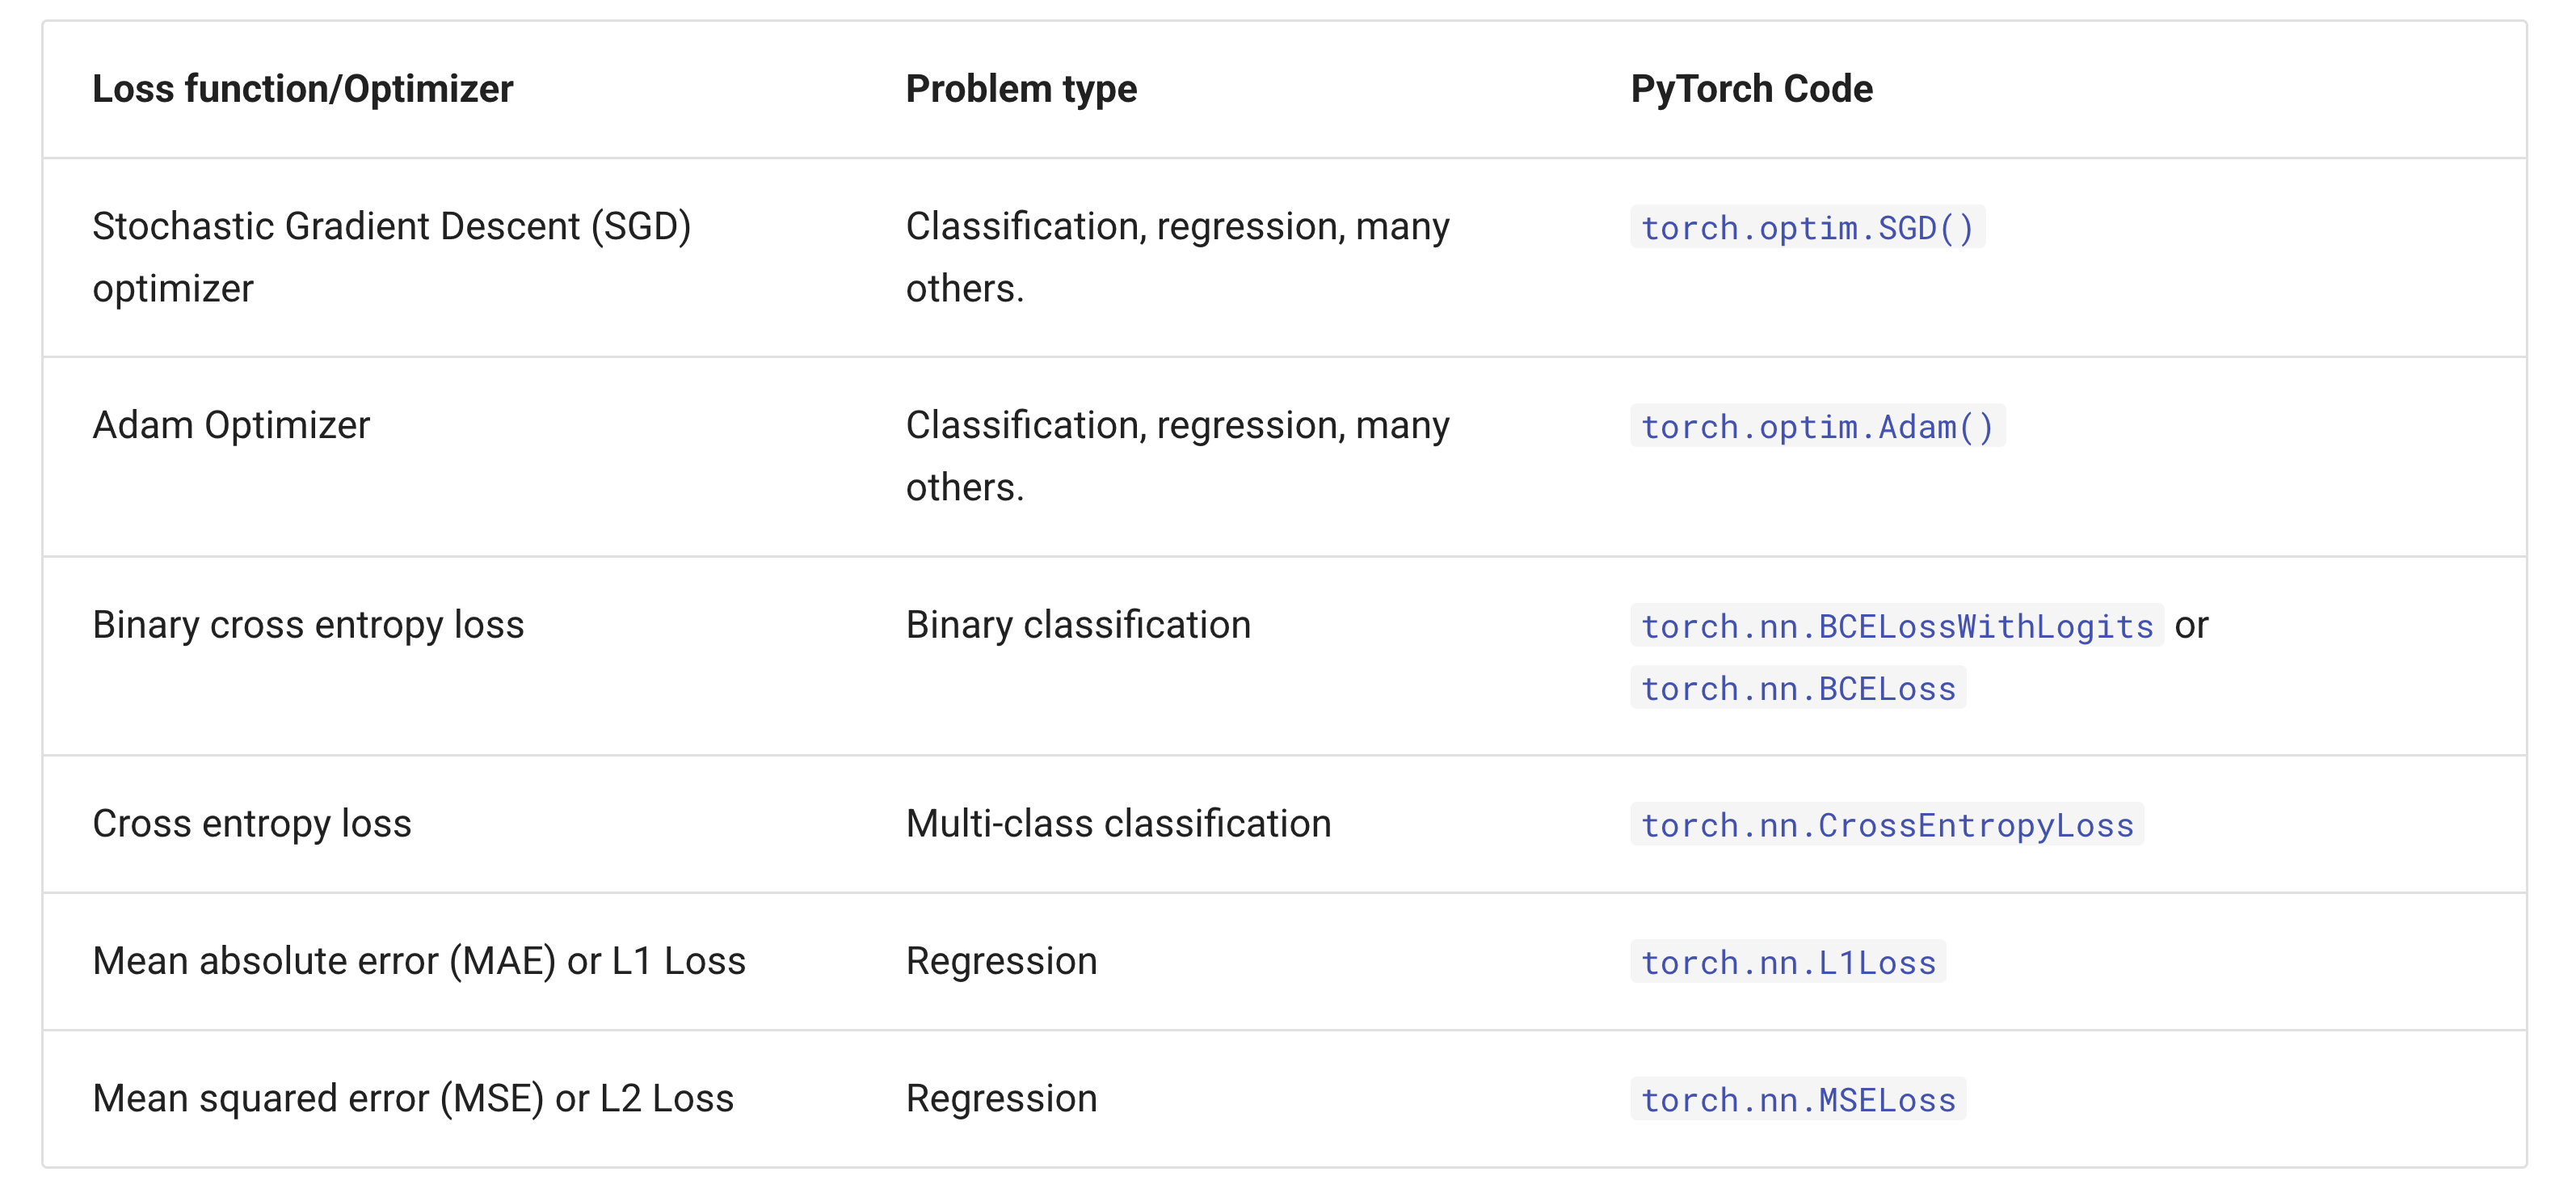


Since we're working with a binary classification problem, let's use a binary cross entropy loss function.

Note: Recall a **loss function** is what measures how wrong your model predictions are, the higher the loss, the worse your model.

Also, PyTorch documentation often refers to loss functions as "loss criterion" or "criterion", these are all different ways of describing the same thing.

PyTorch has two binary cross entropy implementations:

1.[`torch.nn.BCELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html)` - Creates a loss function that measures the binary cross entropy between the target (label) and input (features).

2.[`torch.nn.BCEWithLogitsLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) - This is the same as above except it has a sigmoid layer (`nn.Sigmoid`) built-in.

Which one should we use?

The documentation for `torch.nn.BCEWithLogitsLoss()` states that it's more numerically stable than using `torch.nn.BCELoss()` after a `nn.Sigmoid` layer.

So generally, implementation 2 is a better option. However for advanced usage, you may want to separate the combination of `nn.Sigmoid` and `torch.nn.BCELoss()` but that is beyond the scope of this study.

Knowing this, let's create a loss function and an optimizer.

For the optimizer we'll use `torch.optim.SGD()` to optimize the model parameters with learning rate 0.1.

In [14]:
# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

Now let's also create an **evaluation metric**.

An evaluation metric can be used to offer another perspective on how your model is going

If a loss function measures how wrong your model is, I like to think of evaluation metrics as measuring how right it is. Of course, you could argue both of these are doing the same thing but evaluation metrics offer a different perspective. After all, when evaluating your models it's good to look at things from multiple points of view.

There are several evaluation metrics that can be used for classification problems but let's start out with accuracy.

**Accuracy** can be measured by dividing the total number of correct predictions over the total number of predictions.

For example, a model that makes 99 correct predictions out of 100 will have an accuracy of 99%.

Let's write a function to do so.

In [15]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

#We can now use this function whilst training our model to measure it's performance alongside the loss.

#3. Train model
Okay, now we've got a loss function and optimizer ready to go, let's train a model.

Steps in PyTorch training loop:

1. **Forward pass** - The model goes through all of the training data once, performing its `forward()` function calculations (`model(x_train)`).
2. **Calculate the loss **- The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are (`loss = loss_fn(y_pred, y_train)`.
3. **Zero gradients** - The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step (`optimizer.zero_grad()`).
4. **Perform backpropagation on the loss** - Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with `requires_grad=True`). This is known as backpropagation, hence "backwards" (`loss.backward()`).
5. **Step the optimizer (gradient descent)**- Update the parameters with `requires_grad=True` with respect to the loss gradients in order to improve them (`optimizer.step()`).

#3.1 Going from raw model outputs to predicted labels (logits -> prediction probabilities -> prediction labels)
Before the training loop steps, let's see what comes out of our model during the forward pass (the forward pass is defined by the `forward()` method).

To do so, let's pass the model some data.

In [16]:
# View the frist 5 outputs of the forward pass on the test data
y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.2262],
        [-0.1971],
        [-0.0949],
        [-0.2643],
        [ 0.2349]], grad_fn=<SliceBackward0>)

Since our model hasn't been trained, these outputs are basically random.

But what are they?

They're the output of our `forward()` method.

Which implements two layers of `nn.Linear()` which internally calls the following equation:

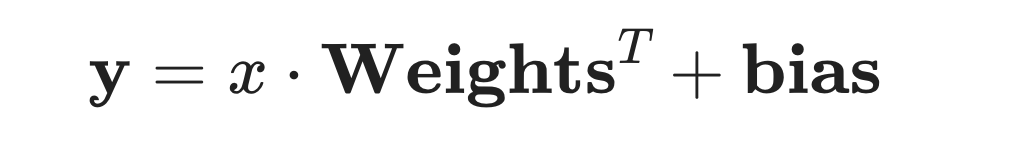


The raw outputs (unmodified) of this equation and in turn, the raw outputs of our model are often referred to as **logits**.

That's what our model is outputing above when it takes in the input data (`x` in the equation or `X_test` in the code), logits.

However, these numbers are hard to interpret. We'd like some numbers that are comparable to our truth labels.

To get our model's raw outputs (logits) into such a form, we can use the [sigmoid activation function](https://pytorch.org/docs/stable/generated/torch.sigmoid.html)

In [17]:
# Use sigmoid on model logits
# y_logits is the frist 5 outputs of the forward pass on the test data
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4437],
        [0.4509],
        [0.4763],
        [0.4343],
        [0.5585]], grad_fn=<SigmoidBackward0>)

It seems like the outputs now have some kind of consistency (even though they're still random). They're now in the form of prediction probabilities (`y_pred_probs`), in other words, the values are now how much the model thinks the data point belongs to one class or another.

In our case, since we're dealing with binary classification, our ideal outputs are 0 or 1.

So these values can be viewed as a decision boundary.

The closer to 0, the more the model thinks the sample belongs to class 0, the closer to 1, the more the model thinks the sample belongs to class 1.

More specificially:

*   If `y_pred_probs` >= 0.5, y=1 (class 1)
*   If `y_pred_probs` < 0.5, y=0 (class 0)



To turn our prediction probabilities into prediction labels, we can round the outputs of the sigmoid activation function.

In [18]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 1.], grad_fn=<SqueezeBackward0>)

Now it looks like our model's predictions are in the same form as our truth labels (`y_test`).

In [19]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

This means we'll be able to compare our model's predictions to the test labels to see how well it's performing.

To recap, we converted our model's raw outputs (logits) to prediction probabilities using a sigmoid activation function.

And then converted the prediction probabilities to prediction labels by rounding them.

Note: The use of the sigmoid activation function is often only for binary classification logits. For multi-class classification, we'll be looking at using the [softmax activation function](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html).

And the use of the sigmoid activation function is not required when passing our model's raw outputs to the `nn.BCEWithLogitsLoss` (the "logits" in logits loss is because it works on the model's raw logits output), this is because it has a sigmoid function built-in already.